<a href="https://colab.research.google.com/github/nitishmishra006/Deep_Portfolio_Theory/blob/master/MTP_Coding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [69]:
dataset = pd.read_csv('Manufacturing.csv',index_col=False,header=0)
dataset.head()
Dnew=pd.DataFrame()
Dnew=dataset
Dnew.set_index('Date')
Dnew=Dnew.dropna(axis=0,how='any')
Dnew.head()


,Date,Open,High,Low,Close
1,24-June-2015,355.47,357.54,353.12,354.35
2,25-June-2015,353.41,358.00,352.82,356.79
3,26-June-2015,356.66,357.54,354.97,356.27
4,29-June-2015,352.81,355.22,349.15,354.67
5,30-June-2015,354.91,359.17,354.61,358.78


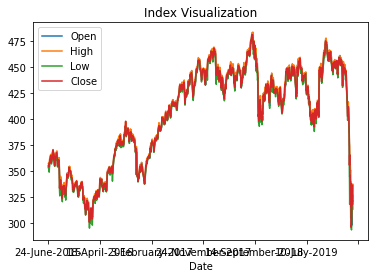

In [70]:
Dnew.plot(x="Date", title ="Index Visualization")

In [106]:
Dnew.info()
Dnew.describe()
print(Dnew.iloc[:,0])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1180 entries, 1 to 1180
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1180 non-null   object 
 1   Open    1180 non-null   float32
 2   High    1180 non-null   float64
 3   Low     1180 non-null   float64
 4   Close   1180 non-null   float64
dtypes: float32(1), float64(3), object(1)
memory usage: 50.7+ KB
1        24-June-2015
2        25-June-2015
3        26-June-2015
4        29-June-2015
5        30-June-2015
            ...      
1176    25-March-2020
1177    26-March-2020
1178    27-March-2020
1179    30-March-2020
1180    31-March-2020
Name: Date, Length: 1180, dtype: object


In [108]:
Matrix= Dnew.corr()
print(Matrix)
Dnew.info()
DataFinal=Dnew.iloc[:,1:]
DataFinal.head()

           Open      High       Low     Close
Open   1.000000  0.998740  0.997969  0.996671
High   0.998740  1.000000  0.997325  0.998426
Low    0.997969  0.997325  1.000000  0.998342
Close  0.996671  0.998426  0.998342  1.000000
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1180 entries, 1 to 1180
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1180 non-null   object 
 1   Open    1180 non-null   float32
 2   High    1180 non-null   float64
 3   Low     1180 non-null   float64
 4   Close   1180 non-null   float64
dtypes: float32(1), float64(3), object(1)
memory usage: 50.7+ KB


,Open,High,Low,Close
1,355.470001,357.54,353.12,354.35
2,353.410004,358.00,352.82,356.79
3,356.660004,357.54,354.97,356.27
4,352.809998,355.22,349.15,354.67
5,354.910004,359.17,354.61,358.78


In [113]:
log_ret =np.log(DataFinal/DataFinal.shift(1))
log_ret=log_ret.dropna(axis=0,how='any')
log_ret.head()

,Open,High,Low,Close
2,-0.005812,0.001286,-0.000850,0.006862
3,0.009154,-0.001286,0.006075,-0.001459
4,-0.010853,-0.006510,-0.016532,-0.004501
5,0.005935,0.011058,0.015517,0.011522
6,0.012627,0.009808,0.013083,0.006972


In [116]:
np.random.seed(42)
num_ports = 6000
# r_free=#
all_weights = np.zeros((num_ports, len(DataFinal.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for x in range(num_ports):
    # Weights
    weights = np.array(np.random.random(4))
    weights = weights/np.sum(weights)
    
    # Save weights
    all_weights[x,:] = weights
    
    # Expected return
    ret_arr[x] = np.sum( (log_ret.mean() * weights * 252))
    
    # Expected volatility
    vol_arr[x] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov()*252, weights)))
    
    # Sharpe Ratio
    sharpe_arr[x] = ret_arr[x]/vol_arr[x]

In [129]:
# getting max sharpe ratio weights from efficient Portfolio
Ratio=sharpe_arr.max()
Location=sharpe_arr.argmax()
Allocated_weights= all_weights[sharpe_arr.argmax()]
Optimal_return=ret_arr[sharpe_arr.argmax()]
Optimal_Volatilty=vol_arr[sharpe_arr.argmax()]
print(DataFinal.columns.values.tolist())
print(Allocated_weights)

['Open', 'High', 'Low', 'Close']
[0.04450092 0.0972124  0.00335176 0.85493492]


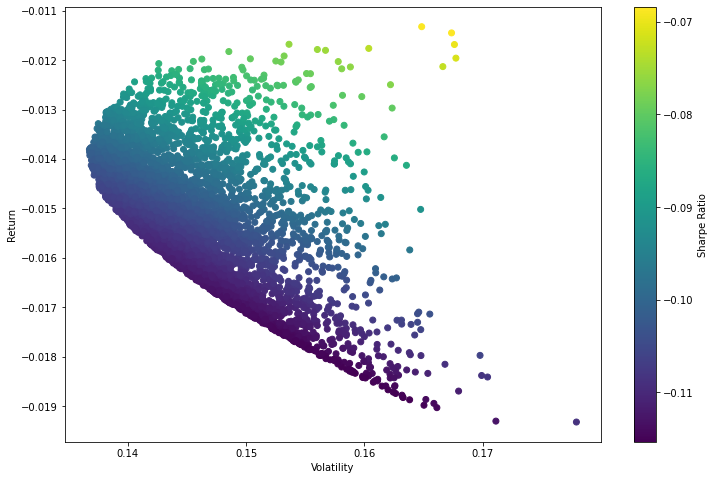

In [123]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
#plt.scatter(Optimal_return, Optimal_Volatilty,c='red') # red dot
plt.show()

In [121]:
def get_ret_vol_sr(weights):
    weights = np.array(weights)
    ret = np.sum(log_ret.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov()*252, weights)))
    sr = ret/vol
    return np.array([ret, vol, sr])

def neg_sharpe(weights):
# the number 2 is the sharpe ratio index from the get_ret_vol_sr
    return get_ret_vol_sr(weights)[2] * -1

def check_sum(weights):
    #return 0 if sum of the weights is 1
    return np.sum(weights)-1

In [138]:
cons=({'type':'eq','fun':check_sum})
bounds=((0,1),(0,1),(0,1),(0,1))
init_guess=[0.25,0.25,0.25,0.25]
from scipy.optimize import minimize



In [142]:
Opt_results = minimize(neg_sharpe,init_guess,method='SLSQP',bounds=bounds,constraints=cons)
print(Opt_results.x)

[1.66533454e-16 0.00000000e+00 2.70953157e-17 1.00000000e+00]


In [122]:
frontier_x = []

for possible_return in frontier_y:
    cons = ({'type':'eq', 'fun':check_sum},
            {'type':'eq', 'fun': lambda w: get_ret_vol_sr(w)[0] - possible_return})
    
    result = minimize(minimize_volatility,init_guess,method='SLSQP', bounds=bounds, constraints=cons)
    frontier_x.append(result['fun'])

NameError: ignored

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.plot(frontier_x,frontier_y, 'r--', linewidth=3)
plt.savefig('cover.png')
plt.show()